In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk

In [6]:
def chunk_preprocessing(df):
    #print(df)
    med_lst_global=[]
    med_str_global=[]
    react_lst_global=[]
    react_str_global=[]
    for ind in range(0,df.shape[0]):
        med_str=''
        med_lst=[]
        react_str=''
        react_lst=[]
        for medicine in df['patient'].iloc[ind]['drug']:
            med_lst.append(medicine['medicinalproduct'])
        for reaction in df['patient'].iloc[ind]['reaction']:
            react_lst.append(reaction['reactionmeddrapt'])
        #Remove duplicates using set
        med_lst_global.append(list(set(med_lst)))
        react_lst_global.append(list(set(react_lst)))
        med_str_global.append(' '.join(list(set(med_lst))))
        react_str_global.append(' '.join(list(set(react_lst))))
    meds=zip(med_lst_global)
    med=pd.DataFrame(meds)
    med_df=pd.DataFrame(zip(med_str_global))
    #print(med)
    reacts=zip(react_lst_global)
    react=pd.DataFrame(reacts)
    react_df=pd.DataFrame(zip(react_str_global))
    try:
        ser=df['serious']
    except:
        ser=pd.DataFrame([np.nan]*df.shape[0])
    try:
        disabling=df['seriousnessdisabling']
    except:
        disabling=pd.DataFrame([np.nan]*df.shape[0])
    try:
        death=df['seriousnessdeath']
    except:
        death=pd.DataFrame([np.nan]*df.shape[0])
    country=df['occurcountry']
    date=df['receivedate']
    df_prep=pd.concat([med,react,ser,death,disabling,country,med_df,react_df,date],axis=1,ignore_index=True)
    df_prep.rename(columns={0:'medications',1:'adverse_reactions',2:'serious',3:'death',4:'disabling',5:'country',6:'meds_str',7:'reacts_str',8:'date'},inplace=True)
    flat_med_lst = []
    #Flatten the list 
    for n, row in df_prep.iterrows():
        for item in row['medications']:
            row['flat_meds'] = item
            flat_med_lst += [row.copy()]
    flat_med_df = pd.DataFrame(flat_med_lst)
    return df_prep, flat_med_df
    

def pull_data():
    pull_ind=0
    tot_df=pd.DataFrame()
    tot_df_flat=pd.DataFrame()
    for j in range(0,1000):
        page = requests.get('https://api.fda.gov/drug/event.json?api_key=CNCu31wY1rTtVzadzO39zfi0iUoOjVva3b0Wf2x2&limit=100&skip='+str(j*100))
        dat=page.json()
        try:
            df_chunk = pd.DataFrame(dat["results"])
        except:
            return tot_df,tot_df_flat
        df,df_flattened=chunk_preprocessing(df_chunk)
        tot_df=pd.concat([tot_df,df],ignore_index=True)
        tot_df_flat=pd.concat([tot_df_flat,df_flattened],ignore_index=True)
    return tot_df,tot_df_flat

tot_df,tot_df_flat=pull_data()

In [7]:
tot_df.to_csv('25100_dat.csv')

In [8]:
tot_df_flat.to_csv('25100_flat.csv')

In [13]:
test=pd.read_csv('25100_dat.csv')

In [14]:
print(test.iloc[25])

Unnamed: 0                                         25
medications                              ['LETAIRIS']
adverse_reactions    ['Ocular hyperaemia', 'Malaise']
serious                                             2
death                                             NaN
disabling                                         NaN
country                                            US
meds_str                                     LETAIRIS
reacts_str                  Ocular hyperaemia Malaise
Name: 25, dtype: object


In [12]:
print(tot_df)

                                             medications  \
0      [PYOSTACINE (PRISTINAMYCIN), OROKEN (CEFIXIME,...   
1                                        [DURAGESIC-100]   
2                                               [BONIVA]   
3                                            [IBUPROFEN]   
4                                               [LYRICA]   
...                                                  ...   
25095                                 [PLAVIX, ASPIRIN.]   
25096                                           [PLAVIX]   
25097                          [IMPLANON, PARAGARD 380A]   
25098      [FLUOROURACIL (FLUOROURACIL)  (FLUOROURACIL)]   
25099                                          [MIRALAX]   

                                       adverse_reactions serious death  \
0               [ARTHRALGIA, OEDEMA PERIPHERAL, PURPURA]       1   NaN   
1                  [OVERDOSE, DRUG ADMINISTRATION ERROR]       1     1   
2            [Headache, Vomiting, Arthralgia, Diarrhoea] 

In [11]:
print(tot_df.shape)

(25100, 8)


In [8]:
#Countries downloaded from 'https://developers.google.com/public-data/docs/canonical/countries_csv')


In [19]:
print(tot_df.iloc[0])

medications          [OFLOXACIN, ROCEPHIN, OROKEN (CEFIXIME, UNSPEC...
adverse_reactions             [OEDEMA PERIPHERAL, PURPURA, ARTHRALGIA]
serious                                                              1
death                                                              NaN
disabling                                                          NaN
country                                                            NaN
meds_str             OFLOXACIN ROCEPHIN OROKEN (CEFIXIME, UNSPEC) P...
reacts_str                        OEDEMA PERIPHERAL PURPURA ARTHRALGIA
Name: 0, dtype: object


In [8]:
print(tot_df_flat)

                                             medications  \
0      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
1      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
2      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
3      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
4                                        [DURAGESIC-100]   
...                                                  ...   
69448                                           [PLAVIX]   
69449                          [IMPLANON, PARAGARD 380A]   
69450                          [IMPLANON, PARAGARD 380A]   
69451      [FLUOROURACIL (FLUOROURACIL)  (FLUOROURACIL)]   
69452                                          [MIRALAX]   

                                       adverse_reactions serious death  \
0               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA]       1   NaN   
1               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA]       1   NaN   
2               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA] 

# NLP Analysis

In [2]:
tot_df=pd.read_csv('25100_dat.csv')

In [3]:
print(np.unique(tot_df['serious']))

[1 2]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(25100, 7980)


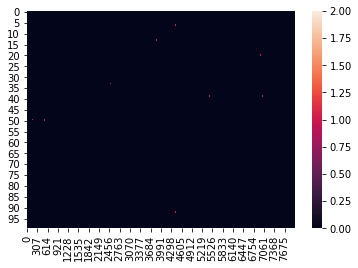

In [15]:
meds_str=tot_df['meds_str']
corpus=meds_str.values
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(X.shape)
import seaborn as sns
sns.heatmap(X.toarray()[:100,:])
plt.show()

In [11]:
# This code was adapted from https://stackoverflow.com/questions/11763613/python-list-of-ngrams-with-frequencies/11766018

0        PYOSTACINE (PRISTINAMYCIN) OROKEN (CEFIXIME, U...
1                                            DURAGESIC-100
2                                                   BONIVA
3                                                IBUPROFEN
4                                                   LYRICA
                               ...                        
25095                                      PLAVIX ASPIRIN.
25096                                               PLAVIX
25097                               IMPLANON PARAGARD 380A
25098          FLUOROURACIL (FLUOROURACIL)  (FLUOROURACIL)
25099                                              MIRALAX
Name: meds_str, Length: 25100, dtype: object
255 low calcium
255 dianeal low calcium
255 dianeal low
217 adcirca letairis
180 revatio letairis
170 isoflurane usp
170 forane isoflurane usp
170 forane isoflurane
169 letairis tyvaso
145 folic acid
114 for women
113 oxytrol for women
113 oxytrol for
103 usp succinylcholine
103 isoflurane usp succinylcho

2 women lisinopril
2 women diltiazem hydrochloride
2 women diltiazem
2 with vitamin jakafi
2 with minerals
2 with dextrose baxter
2 with amino
2 wellbutrin suboxone film
2 wellbutrin suboxone
2 wellbutrin sr
2 wellbutrin effexor
2 wellbutrin depakote
2 wellbutrin ambien
2 wart remover
2 warfarin valsartan
2 warfarin tamsulosin
2 warfarin sodium amoxicillin
2 warfarin revatio letairis
2 warfarin revatio adcirca
2 warfarin magnesium
2 warfarin levothyroxine jakafi
2 warfarin levothyroxine
2 warfarin letairis epoprostenol
2 warfarin fish oil
2 warfarin fish
2 warfarin calcium
2 warfarin amiodarone methylprednisolone
2 warfarin amiodarone
2 warfarin allopurinol jakafi
2 vyvanse wellbutrin
2 vx 809 fdc
2 vx 770 fdc
2 votrient 200mg
2 voor infusievloeistof
2 voltaren folic acid
2 voltaren folic
2 voltaren 00372301
2 vitamins vitamins
2 vitamins aspirin
2 vitamins 90003601
2 vitamin with
2 vitamin vitamin b12
2 vitamin unspecified
2 vitamin substances doxazosin
2 vitamin substances
2 vitamin 

2 furosemide protonix
2 furosemide prednisone
2 furosemide omeprazole spironolactone
2 furosemide multivitamin omeprazole
2 furosemide multivitamin
2 furosemide hydrocodone
2 furosemide crestor
2 furosemide calcium
2 furosemide aspirin
2 fumarate omeprazole
2 fumarate allopurinol eplerenone
2 fumarate allopurinol
2 fty 720
2 frisium lamictal
2 forte folic acid
2 forte folic
2 forte betamethasone azathioprine
2 forte betamethasone
2 formoterol fumarate
2 for women metformin
2 for women losartan
2 for women lisinopril
2 for women diltiazem
2 for inf 5mg
2 folio forte folic
2 folio forte betamethasone
2 folinic acid folinic
2 folinate de calcium
2 folinate de
2 folic acid tylenol
2 folic acid salbutamol
2 folic acid oxytrol
2 folic acid omega
2 folic acid magnesium
2 folic acid losartan
2 folic acid lexapro
2 folic acid lamotrigine
2 folic acid folic
2 folic acid fluconazole
2 folic acid avodart
2 folic acid amitriptyline
2 fluticasone salmeterol
2 fluticasone propionate fluticasone
2 flu

1 xolair levothyroxine epipen
1 xolair levothyroxine
1 xolair dulera prednisone
1 xolair dulera
1 xolair aspirin singular
1 xolair aspirin
1 xl vitamin
1 xl triamcinolone insulin
1 xl triamcinolone
1 xl simvastatin
1 xl proventil
1 xl proair hfa
1 xl proair
1 xl premarin
1 xl prednisone asa
1 xl pravastatin vitamin
1 xl pravastatin
1 xl phoslo neurontin
1 xl phoslo
1 xl paroxetine hydrochloride
1 xl paroxetine
1 xl oxycontin multivitamin
1 xl oxycontin
1 xl niaspan astepro
1 xl niaspan
1 xl neurontin detrol
1 xl neurontin
1 xl losartan lasix
1 xl losartan
1 xl levothyroxine sodium
1 xl levothyroxine
1 xl jakafi muscle
1 xl jakafi
1 xl glyburide lanoxin
1 xl glyburide
1 xl forfivo xl
1 xl forfivo
1 xl cozaar neosporin
1 xl cozaar
1 xl celexa
1 xl celecoxib atorvastatin
1 xl celecoxib
1 xl benazepril hydrochlorothiazide
1 xl benazepril
1 xl baby aspirin
1 xl baby
1 xl aspirin tricor
1 xl aspirin silver
1 xl antivert amiloride
1 xl antivert
1 xl accupril protonix
1 xl accupril
1 xjade jak

1 unknown lansoprazole
1 unknown keppra asa
1 unknown keppra
1 unknown influsplit ssw
1 unknown influsplit
1 unknown infliximab methotrexate
1 unknown infliximab
1 unknown glimepiride
1 unknown gentamicin unknown
1 unknown gentamicin
1 unknown fosamax unknown
1 unknown fosamax
1 unknown fluorouracil unknown
1 unknown fluorouracil
1 unknown faslodex 01285001
1 unknown faslodex
1 unknown epirubicin unknown
1 unknown epirubicin
1 unknown drug for
1 unknown drug arixtra
1 unknown diazepam nifedipine
1 unknown diazepam
1 unknown dexamethasone unknown
1 unknown dexamethasone sodium
1 unknown cymbalta
1 unknown crestor
1 unknown corticoid methotrexate
1 unknown corticoid
1 unknown codeine compound
1 unknown codeine
1 unknown co codamol
1 unknown co
1 unknown citalopram
1 unknown cisplatin unknown
1 unknown cisplatin
1 unknown cipramil 00582602
1 unknown cipramil
1 unknown cipralex
1 unknown cholesterol medication
1 unknown cholesterol
1 unknown cetuximab
1 unknown cetirizine unknown
1 unknown

1 t4 sinvastacor
1 system morphine
1 systane ultra high
1 systane ultra
1 systane uceris simbrinza
1 systane uceris
1 systane flaxseed fluconazole
1 systane flaxseed
1 syringe jakafi
1 synthroid zocor jakafi
1 synthroid zocor
1 synthroid zetia victoza
1 synthroid zetia
1 synthroid wellbutrin xl
1 synthroid wellbutrin
1 synthroid vitamin jakafi
1 synthroid vitamin
1 synthroid valtrex certolizumab
1 synthroid valtrex
1 synthroid valsartan dexamethasone
1 synthroid valsartan
1 synthroid valium lisinopril
1 synthroid valium
1 synthroid uroxatral advair
1 synthroid uroxatral
1 synthroid tracleer sildenafil
1 synthroid tracleer rythmol
1 synthroid tracleer procrit
1 synthroid tecfidera trazodone
1 synthroid tecfidera cozaar
1 synthroid tecfidera ascorbic
1 synthroid taxotere herceptin
1 synthroid taxotere
1 synthroid sorafenib raf
1 synthroid sorafenib
1 synthroid seroquel lexapro
1 synthroid seroquel
1 synthroid risperdal citalopram
1 synthroid risperdal
1 synthroid reclast detrol
1 synthro

1 rythmol jakafi doxepin
1 rythmol jakafi
1 rythmol hydrochlorothiazide cardizem
1 rythmol hydrochlorothiazide
1 rx ibuprofen astepro
1 rx ibuprofen
1 rx 200 mg
1 rx 200
1 russia cisplatine herceptin
1 russia cisplatine
1 ruscus aculeatus butcher
1 ruscus aculeatus
1 rupatadine adenuric dafalgan
1 rupatadine adenuric
1 rozerem betanis
1 roxicodone septra nystatin
1 roxicodone septra
1 roxicodone fluticasone flonase
1 roxicodone fluticasone
1 roxflan losartan natrilix
1 roxflan losartan flux
1 rowasa ferrous lialda
1 rowasa ferrous
1 rovalcyte levothyrox
1 rosuvastatin spironolactone and
1 rosuvastatin spironolactone
1 rosuvastatin memantine aricept
1 rosuvastatin memantine
1 rosuvastatin lovenox acebutolol
1 rosuvastatin lovenox
1 rosuvastatin diazepam metformin
1 rosuvastatin diazepam
1 rosuvastatin clonazepam potassium
1 rosuvastatin clonazepam
1 rosuvastatin bendroflumethiazide dabigatran
1 rosuvastatin bendroflumethiazide
1 rosuvastatin aspirin blinded
1 rosuvastatin aspirin
1 rosu

1 prednisone fosamax
1 prednisone flovent
1 prednisone feldopine
1 prednisone eltroxin dexamethasone
1 prednisone eltroxin
1 prednisone dexamethasone vincristine
1 prednisone dexamethasone dexamethasone
1 prednisone colchicine novorapid
1 prednisone colchicine
1 prednisone clonazepam lortab
1 prednisone clonazepam
1 prednisone bystolic amitriptyline
1 prednisone bystolic
1 prednisone budesonide
1 prednisone baraclude
1 prednisone azithromycin yaz
1 prednisone azithromycin
1 prednisone azathioprine omeprazole
1 prednisone alkeran
1 prednisone advair hfa
1 prednisone advair disc
1 prednisone acz885 anakinra
1 prednisone acz885
1 prednisone acetylcysteine simvastatin
1 prednisone acetylcysteine
1 prednisone 00044702 vincristine
1 prednisone 00044702
1 prednison calcichew
1 prednisolone xalatan avodart
1 prednisolone xalatan
1 prednisolone warfarin warfarin
1 prednisolone warfarin
1 prednisolone vincristine paracetamol
1 prednisolone vincristine dihydrocodeine
1 prednisolone unknown cipram

1 opana b12
1 opalmon tramacet lac
1 opalmon tramacet
1 onyx pharmaceuticals irinotecan
1 onyx pharmaceuticals
1 onseran dexamethasone oxaliplatin
1 onseran dexamethasone
1 onglyza tabs mg
1 onglyza byetta januvia
1 onglyza byetta
1 onfi sabril for
1 onfi sabril
1 onfi oral suspension
1 onfi oral
1 onfi multiple vitamin
1 onfi multiple
1 oneflu septrin
1 onealfa ambrisentan
1 one step zoloft
1 one step take
1 one step paragard
1 one step multivitamin
1 one step lantus
1 one step amoxicillin
1 one step adderall
1 one day womens
1 one day women
1 one day multivitamin
1 ondansetron yaz oxycodone
1 ondansetron yaz
1 ondansetron tramadol sutent
1 ondansetron tramadol
1 ondansetron pulmozyme vx
1 ondansetron pulmozyme
1 ondansetron polaramine erbitux
1 ondansetron polaramine
1 ondansetron percocet everolimus
1 ondansetron percocet
1 ondansetron oxaliplatin prochlorperazine
1 ondansetron oxaliplatin loperamide
1 ondansetron oxaliplatin cipro
1 ondansetron obinutuzumab fasturtec
1 ondansetron 

1 motrin betamethasone
1 motrin asa
1 motrin aranesp
1 motivan 00019501 simvastatin
1 motivan 00019501
1 motilium alprazolam votrient
1 motilium alprazolam
1 motilitone flavin adenine
1 motilitone flavin
1 mosapride citrate vasolan
1 mosapride citrate gascon
1 morphine yasmin advil
1 morphine yasmin
1 morphine xanax heroin
1 morphine xanax
1 morphine unknown
1 morphine tussionex fioricet
1 morphine tussionex
1 morphine trazodone vitamin
1 morphine trazodone
1 morphine sulphate rituximab
1 morphine sulphate jakafi
1 morphine sulfate similar
1 morphine sulfate proglycem
1 morphine sulfate methotrexate
1 morphine sulfate meloxicam
1 morphine sulfate lisinopril
1 morphine sulfate lidocaine
1 morphine sulfate jakafi
1 morphine sulfate investigational
1 morphine sulfate gabapentin
1 morphine sulfate extended
1 morphine sulfate er
1 morphine sulfate creon
1 morphine sulfate bupivacaine
1 morphine sulfate acetaminophen
1 morphine ritalin
1 morphine protonix acyclovir
1 morphine protonix
1 morp

1 low tylenol
1 low estrogen birth
1 low estrogen
1 low ec plavix
1 low ec
1 low dose tylenol
1 low dose aspirin
1 low coreg vitamins
1 low coreg
1 low calcium meq
1 low calcium clonidine
1 lovenox vitamin complex
1 lovenox vitamin
1 lovenox tyvasco aldactone
1 lovenox tyvasco
1 lovenox tiapridal augmentin
1 lovenox tiapridal
1 lovenox metformin norepinephrine
1 lovenox metformin carvedilol
1 lovenox fluorouracil depakine
1 lovenox fluorouracil
1 lovenox exelon primidone
1 lovenox exelon
1 lovenox enoxaparin sodium
1 lovenox enoxaparin
1 lovenox cardizem toprol
1 lovenox cardizem
1 lovenox atenolol hydroxyzine
1 lovenox atenolol
1 lovenox aspirin multivitamin
1 lovenox aspirin
1 lovenox acebutolol coumadine
1 lovenox acebutolol
1 lovaza synthroid tracleer
1 lovaza synthroid
1 lovaza metoprolol pravastatin
1 lovaza metoprolol
1 lovaza lortab januvia
1 lovaza lortab
1 lovaza jakafi amaryl
1 lovaza jakafi
1 lovaza ibuprofen multivitamin
1 lovaza ibuprofen
1 lovaza hydromorphone acuvail
1 

1 keppra iktorivil depakine
1 keppra iktorivil
1 keppra diastat onfi
1 keppra diastat
1 keppra depakote niaspan
1 keppra depakote atenolol
1 keppra depakote amiodarone
1 keppra depakote ambien
1 keppra decadron
1 keppra cyclophosphamide tamoxifen
1 keppra cyclophosphamide
1 keppra carbamazepine onfi
1 keppra carbamazepine lamictal
1 keppra aspirin trazodone
1 keppra aspirin
1 keppra asa unknown
1 keppra asa
1 keppra afinitor disperz
1 keppra afinitor
1 kelp omega
1 kefral sawacillin maglax
1 kefral sawacillin
1 keflex tussi organidin
1 keflex tussi
1 keflex lasix ceftazidime
1 keflex lasix
1 keflex effexor vicodin
1 keflex dexilant invokana
1 keflex dexilant
1 keflex ambien mirena
1 keflex ambien
1 kcl synthroid b12
1 kcl synthroid actonel
1 kcl lipitor topamax
1 kcl lipitor
1 kcl diosmectal questran
1 kcl diosmectal
1 kaskadil previscan lovenox
1 kaskadil previscan
1 karvea oroxine ostelin
1 karvea oroxine
1 karvea ezetrol diltiazem
1 karvea ezetrol
1 kardegic verapamil diffu
1 kardeg

1 hydrochloride tablets
1 hydrochloride spironolactone aspirin
1 hydrochloride spironolactone
1 hydrochloride sotalol hydrochloride
1 hydrochloride sotalol
1 hydrochloride sof ldv
1 hydrochloride sof
1 hydrochloride similar to
1 hydrochloride similar
1 hydrochloride seroquel xr
1 hydrochloride seroquel
1 hydrochloride seretide discus
1 hydrochloride seretide
1 hydrochloride sandoz tiazac
1 hydrochloride sandoz bisoprolol
1 hydrochloride salmeterol xinafoate
1 hydrochloride salmeterol
1 hydrochloride risperidone
1 hydrochloride red blood
1 hydrochloride red
1 hydrochloride ramipril salmeterol
1 hydrochloride ramipril aliflus
1 hydrochloride quetiapine quetiapine
1 hydrochloride quetiapine
1 hydrochloride provigil losartan
1 hydrochloride provigil
1 hydrochloride protaphane simvastatin
1 hydrochloride protaphane
1 hydrochloride prednisone
1 hydrochloride pravachol oxycodone
1 hydrochloride pravachol
1 hydrochloride potassium chloride
1 hydrochloride potassium
1 hydrochloride picato gel
1

1 forte vitamin aspirin
1 forte vitamin
1 forte venlafaxine
1 forte sulfamethoxazole trimethoprim
1 forte sulfamethoxazole
1 forte parafon calcium
1 forte parafon
1 forte fluarix aclasta
1 forte fluarix
1 forte eye drops
1 forte eye
1 forte codeine halcion
1 forte codeine
1 forte alendronic acid
1 forte alendronic
1 fortaz prograf zinc
1 fortaz prograf
1 formulation unknown tenofovir
1 formulation unknown
1 formula prilosec
1 formula clobex vitamins
1 formula clobex
1 formula 405
1 formoterol hydrochlorothiazide lisinopril
1 formoterol hydrochlorothiazide
1 formoterol fumarate pantoprazolo
1 formoterol fumarate modafinil
1 formoterol aerosal inhaler
1 formoterol aerosal
1 forlax 00754501 lysanxia
1 forlax 00754501
1 forfivo xl
1 foraseq tamoxifen citrate
1 foraseq tamoxifen
1 for women tums
1 for women tramadol
1 for women reclipsen
1 for women omeprazole
1 for women lexapro
1 for women iron
1 for women insulin
1 for women hydrochlorothiazide
1 for women glimepiride
1 for women fiber
1

1 doxorubicin methotrexate
1 doxorubicin inj usp
1 doxorubicin inj
1 doxorubicin hydrochloride vogalene
1 doxorubicin hydrochloride tamoxifen
1 doxorubicin hydrochloride mercaptopurine
1 doxorubicin hydrochloride daunorubicin
1 doxorubicin hydrochloride cyclophosphamide
1 doxorubicin hydrochloride amitriptyline
1 doxorubicin galvus epirubicin
1 doxorubicin galvus
1 doxorubicin doxorubicin adriamycin
1 doxorubicin doxorubicin
1 doxorubicin decadron kadcyla
1 doxorubicin decadron
1 doxorubicin cyclophosphamide tablets
1 doxorubicin cyclophosphamide solu
1 doxorubicin clopidogrel bisulfate
1 doxorubicin clopidogrel
1 doxorubicin cisplatin vinblastine
1 doxorubicin chlorphenamine velcade
1 doxorubicin chlorphenamine
1 doxorubicin chemotherapeutics zoledronic
1 doxorubicin chemotherapeutics
1 doxorubicin bleomycin valaciclovir
1 doxorubicin bleomycin
1 doxorubicin adriamycin doxorubicin
1 doxorubicin adriamycin
1 doxium distraneurin venlafaxine
1 doxium distraneurin
1 doxil doxorubicin hydr

1 cozaar neosporin bacitracin
1 cozaar neosporin
1 cozaar metoprolol tartrate
1 cozaar metoprolol
1 cozaar methylprednisolon levaquin
1 cozaar methylprednisolon
1 cozaar metformin waran
1 cozaar metformin
1 cozaar lexapro zocor
1 cozaar lexapro lialda
1 cozaar lexapro jakafi
1 cozaar jakafi toprol
1 cozaar jakafi
1 cozaar hctz ranitidine
1 cozaar hctz
1 cozaar alphagan lasix
1 cozaar alphagan
1 cox inhibitor
1 coversyl prednisone
1 coversyl esidrex amlor
1 coversyl esidrex
1 coversyl crestor omeprazole
1 coversyl crestor
1 coversyl aldactone pradaxa
1 coversyl aldactone
1 coversyl 00790702 caltan
1 coversyl 00790702
1 coveram esidrex
1 coumadine valaciclovir
1 coumadine riluzole
1 coumadin yervoy
1 coumadin vitamin
1 coumadin unknown medication
1 coumadin unknown
1 coumadin tracleer sildenafil
1 coumadin stool softner
1 coumadin stool
1 coumadin sodium multivitamin
1 coumadin sodium lasix
1 coumadin simvastatin
1 coumadin sildenafil veletri
1 coumadin revatio sildenafil
1 coumadin reva

1 cephalexin 00145501 carvedilol
1 cephalexin 00145501 aspirin
1 cephadol foscavir allopurinol
1 cephadol foscavir
1 cephadol depas fluvastatin
1 cephadol depas
1 centrum xalatan jakafi
1 centrum xalatan
1 centrum ultra mens
1 centrum ultra
1 centrum synthroid hydrochlorothiazide
1 centrum synthroid
1 centrum silver vitamin
1 centrum silver sutent
1 centrum silver simvastatin
1 centrum silver prilosec
1 centrum silver pradaxa
1 centrum silver miralax
1 centrum silver jakafi
1 centrum silver fish
1 centrum silver calcium
1 centrum silver aranesp
1 centrum silver anastrozole
1 centrum quetiapine seroquel
1 centrum quetiapine
1 centrum materna nasen
1 centrum materna
1 centrum levemir tylenol
1 centrum levemir
1 centrum allopurinol aspirin
1 centrum allopurinol
1 centrum 02217401 anagrelide
1 centrum 02217401
1 cells topalgic solu
1 cells topalgic
1 cells prednisone acetylcysteine
1 cells prednisone
1 cells crataegutt
1 cellcept tranxene tab
1 cellcept tranxene
1 cellcept tracleer
1 cellc

1 baby aspirin metoprolol
1 baby aspirin megared
1 baby aspirin jakafi
1 baby aspirin irbesartan
1 baby aspirin hydroxyurea
1 baby aspirin hydroxychloroquine
1 baby aspirin furosemide
1 baby aspirin dianeal
1 baby aspirin desonide
1 baby aspirin benazepril
1 baby aspirin allopurinol
1 baby aspirin acetylsalicylic
1 baby asa lortab
1 baby asa
1 b6 trazodone
1 b6 propecia micardis
1 b6 propecia
1 b6 niaspan vitamin
1 b6 niaspan
1 b6 multivitamins other
1 b6 multivitamins
1 b6 megace digoxin
1 b6 megace
1 b6 keppra afinitor
1 b6 keppra
1 b6 flovent
1 b6 bupropion hcl
1 b6 bupropion
1 b6 bilberry vitamin
1 b6 bilberry
1 b6 b12 ergocalciferol
1 b6 b12
1 b6 axid green
1 b6 axid
1 b2 benadryl orencia
1 b2 benadryl
1 b12 xanax 1000
1 b12 xanax
1 b12 trental jakafi
1 b12 trental
1 b12 substances
1 b12 oxycontin erlotinib
1 b12 oxycontin
1 b12 nos edarbi
1 b12 neulasta omeprazole
1 b12 neulasta
1 b12 metolazone darvocet
1 b12 metolazone
1 b12 jakafi lisinopril
1 b12 jakafi immunoglobulin
1 b12 i

1 amiodarona furosemid
1 aminoleban avastin paclitaxel
1 aminoleban avastin
1 amino acids furosemid
1 amino acid solution
1 amilzide dovobet vitamin
1 amilzide dovobet
1 amiloride zestril protonix
1 amiloride zestril
1 amiloride xanax nitrostat
1 amiloride xanax
1 amiloride jakafi
1 amiloride hydrochloride hydrochlorothiazide
1 amiloride hydrochloride
1 amiklin vitamin ibuprofen
1 amiklin vitamin
1 amikacin sulfate piperacillin
1 amikacin sulfate
1 amikacin paracetamol metronidazole
1 amikacin paracetamol
1 amikacin ipratropium paracetamol
1 amikacin ipratropium clindamycin
1 amias aspirin omeprazole
1 amias aspirin
1 ametycine elvorine solu
1 ametycine elvorine
1 ambroxol hydrochloride potassium
1 ambroxol hydrochloride flaveric
1 ambrisentan tablets adcirca
1 ambrisentan letairis
1 ambrisentan flolan viagra
1 ambrisentan flolan
1 ambisome hydrea jakafi
1 ambisome hydrea
1 ambilify unknown add
1 ambilify unknown
1 ambien zyrtec norco
1 ambien zyrtec
1 ambien zolpidem metformin
1 ambie

1 770 combination
1 75mg ml saco
1 75mg ml
1 750 trazodone amoxicillin
1 750 trazodone
1 75 npl
1 75 milligram capsule
1 75 milligram
1 75 mg temazepam
1 745 merbentyl fluoxetine
1 745 merbentyl
1 745 ferrous fumarate
1 745 ferrous
1 74 862
1 720 stilnox
1 70 nph
1 70 mg comp
1 70 mg
1 70 dextrose injection
1 70 dextrose
1 70 30 lisinopril
1 70 30
1 6mg ml
1 65mg film coated
1 65mg film
1 656 tussin dm
1 656 tussin
1 650 mg oral
1 650 mg
1 64 levothyroxine losartan
1 64 levothyroxine
1 600 tecfidera multi
1 600 tecfidera
1 600 mg plus
1 600 lisinopril jakafi
1 600 lisinopril
1 600 hydrochlorothiazide jakafi
1 600 hydrochlorothiazide
1 5ml vial aciclovir
1 5ml vial
1 5ml susp
1 5ml bleomycin bleomycin
1 5ml bleomycin
1 5mg novartis
1 5mg ml docetaxel
1 5mg ml calcium
1 5mg atarax urso
1 5mg atarax
1 516 aspirin fioricet
1 516 aspirin
1 50mg paroxetine sorentmin
1 50mg paroxetine
1 50mg januvia tablets
1 50mg januvia
1 50mg glaxo smithkline
1 50mg glaxo
1 50mg bayaspirin amaryl
1 50mg ba

In [18]:
print(X.shape)

(25100, 42461)


In [15]:
print(tot_df.iloc[25])

medications                            [LETAIRIS]
adverse_reactions    [Ocular hyperaemia, Malaise]
serious                                         2
death                                         NaN
disabling                                     NaN
country                                        US
meds_str                                 LETAIRIS
reacts_str              Ocular hyperaemia Malaise
Name: 25, dtype: object


In [17]:
test=pd.read_csv('25100_dat.csv')

In [18]:
print(test.iloc[25])

Unnamed: 0                                         25
medications                              ['LETAIRIS']
adverse_reactions    ['Ocular hyperaemia', 'Malaise']
serious                                             2
death                                             NaN
disabling                                         NaN
country                                            US
meds_str                                     LETAIRIS
reacts_str                  Ocular hyperaemia Malaise
Name: 25, dtype: object


In [19]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")

In [20]:
print(df)

                 country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8

In [3]:
alpha_path='alpha_2_3.csv'
alpha=pd.read_csv(alpha_path,header=0)
  #alpha.rename(columns={'Alpha-2 code':'country_code'},inplace=True)
  #print(death_df)
alpha['country_code'] = alpha['country_code'].map(lambda x: x.replace('\"',''))
alpha['Alpha-3 code'] = alpha['Alpha-3 code'].map(lambda x: x.replace('\"',''))

In [4]:
print(alpha)

               Country country_code Alpha-3 code Numeric code  \
0          Afghanistan           AF          AFG          "4"   
1              Albania           AL          ALB          "8"   
2              Algeria           DZ          DZA         "12"   
3       American Samoa           AS          ASM         "16"   
4              Andorra           AD          AND         "20"   
..                 ...          ...          ...          ...   
252  Wallis and Futuna           WF          WLF        "876"   
253     Western Sahara           EH          ESH        "732"   
254              Yemen           YE          YEM        "887"   
255             Zambia           ZM          ZMB        "894"   
256           Zimbabwe           ZW          ZWE        "716"   

    Latitude (average) Longitude (average)  
0                 "33"                "65"  
1                 "41"                "20"  
2                 "28"                 "3"  
3           "-14.3333"              "-1

In [5]:
tot_df.rename(columns={'country':'country_code'},inplace=True)

In [30]:
pd.merge(tot_df.dropna(),alpha,on='country_code')
#print(tot_df['country_code'])b

,medications,adverse_reactions,serious,death,disabling,country_code,meds_str,reacts_str,Country,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)


In [32]:
print(tot_df['country_code'].dropna())

4        US
5        US
6        US
7        US
8        US
         ..
25094    US
25095    US
25096    US
25097    US
25099    US
Name: country_code, Length: 22986, dtype: object


In [41]:
z=tot_df['country_code'].dropna()
tot_df.merge(alpha,on='country_code')

,medications,adverse_reactions,serious,death,disabling,country_code,meds_str,reacts_str,Country,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)


In [48]:
cntr_dict={}
for ind in range(0,alpha.shape[0]):
    cntr_dict[alpha.iloc[ind]['country_code']]=alpha.iloc[ind]['Alpha-3 code']
print(cntr_dict)

{' AF': ' AFG', ' AL': ' ALB', ' DZ': ' DZA', ' AS': ' ASM', ' AD': ' AND', ' AO': ' AGO', ' AI': ' AIA', ' AQ': ' ATA', ' AG': ' ATG', ' AR': ' ARG', ' AM': ' ARM', ' AW': ' ABW', ' AU': ' AUS', ' AT': ' AUT', ' AZ': ' AZE', ' BS': ' BHS', ' BH': ' BHR', ' BD': ' BGD', ' BB': ' BRB', ' BY': ' BLR', ' BE': ' BEL', ' BZ': ' BLZ', ' BJ': ' BEN', ' BM': ' BMU', ' BT': ' BTN', ' BO': ' BOL', ' BA': ' BIH', ' BW': ' BWA', ' BV': ' BVT', ' BR': ' BRA', ' IO': ' IOT', ' BN': ' BRN', ' BG': ' BGR', ' BF': ' BFA', ' BI': ' BDI', ' KH': ' KHM', ' CM': ' CMR', ' CA': ' CAN', ' CV': ' CPV', ' KY': ' CYM', ' CF': ' CAF', ' TD': ' TCD', ' CL': ' CHL', ' CN': ' CHN', ' CX': ' CXR', ' CC': ' CCK', ' CO': ' COL', ' KM': ' COM', ' CG': ' COG', ' CD': ' COD', ' CK': ' COK', ' CR': ' CRI', ' CI': ' CIV', ' HR': ' HRV', ' CU': ' CUB', ' CY': ' CYP', ' CZ': ' CZE', ' DK': ' DNK', ' DJ': ' DJI', ' DM': ' DMA', ' DO': ' DOM', ' EC': ' ECU', ' EG': ' EGY', ' SV': ' SLV', ' GQ': ' GNQ', ' ER': ' ERI', ' EE': ' 

In [49]:
tot_df.replace({"country_code": cntr_dict})

,medications,adverse_reactions,serious,death,disabling,country_code,meds_str,reacts_str
0,"[ROCEPHIN, PYOSTACINE (PRISTINAMYCIN), OFLOXAC...","[OEDEMA PERIPHERAL, PURPURA, ARTHRALGIA]",1,NaN,NaN,NaN,ROCEPHIN PYOSTACINE (PRISTINAMYCIN) OFLOXACIN ...,OEDEMA PERIPHERAL PURPURA ARTHRALGIA
1,[DURAGESIC-100],"[OVERDOSE, DRUG ADMINISTRATION ERROR]",1,1,NaN,NaN,DURAGESIC-100,OVERDOSE DRUG ADMINISTRATION ERROR
2,[BONIVA],"[Headache, Diarrhoea, Arthralgia, Vomiting]",1,NaN,1,NaN,BONIVA,Headache Diarrhoea Arthralgia Vomiting
3,[IBUPROFEN],"[Dyspepsia, Renal impairment]",1,NaN,NaN,NaN,IBUPROFEN,Dyspepsia Renal impairment
4,[LYRICA],[Drug ineffective],2,NaN,NaN,US,LYRICA,Drug ineffective
...,...,...,...,...,...,...,...,...
25095,"[ASPIRIN., PLAVIX]","[Multiple injuries, Gastrointestinal haemorrhage]",1,NaN,NaN,US,ASPIRIN. PLAVIX,Multiple injuries Gastrointestinal haemorrhage
25096,[PLAVIX],"[Multiple injuries, Gastrointestinal haemorrhage]",1,NaN,NaN,US,PLAVIX,Multiple injuries Gastrointestinal haemorrhage
25097,"[PARAGARD 380A, IMPLANON]","[Headache, Abdominal discomfort, Pyrexia, Pelv...",2,NaN,NaN,US,PARAGARD 380A IMPLANON,Headache Abdominal discomfort Pyrexia Pelvic pain
25098,[FLUOROURACIL (FLUOROURACIL) (FLUOROURACIL)],"[Hyponatraemia, Off label use]",1,NaN,NaN,NaN,FLUOROURACIL (FLUOROURACIL) (FLUOROURACIL),Hyponatraemia Off label use


In [7]:


def compute_trigrams(full_data):
    meds_str=tot_df['reacts_str']
    print(meds_str)
    corpus=meds_str.values[:10000]

    c_vec = CountVectorizer(ngram_range=(2, 3))

    # input to fit_transform() should be an iterable with strings
    ngrams = c_vec.fit_transform(corpus)

    # needs to happen after fit_transform()
    vocab = c_vec.vocabulary_

    count_values = ngrams.toarray().sum(axis=0)

    count_lst=[]
    trigram_text=[]
    # output n-grams
    for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
        print(ng_count, ng_text)
        count_lst.append(ng_count)
        trigram_text.append(ng_text)
        
    d={'count':count_lst, 'trigram':trigram_text}
    trigram_df=pd.DataFrame(d)
    return trigram_df

In [8]:
trigram_df=compute_trigrams(tot_df)

0                     ARTHRALGIA OEDEMA PERIPHERAL PURPURA
1                       OVERDOSE DRUG ADMINISTRATION ERROR
2                   Headache Vomiting Arthralgia Diarrhoea
3                               Dyspepsia Renal impairment
4                                         Drug ineffective
                               ...                        
25095       Gastrointestinal haemorrhage Multiple injuries
25096       Gastrointestinal haemorrhage Multiple injuries
25097    Pyrexia Abdominal discomfort Headache Pelvic pain
25098                          Hyponatraemia Off label use
25099    Underdose Incorrect drug administration durati...
Name: reacts_str, Length: 25100, dtype: object
523 diabetes mellitus
510 drug ineffective
483 type diabetes mellitus
483 type diabetes
273 count decreased
263 hyperthermia malignant
260 abdominal pain
195 platelet count
179 application site
170 haemoglobin decreased
166 platelet count decreased
150 drug administration
147 pain in
145 weight increase

5 induced thrombocytopenia
5 increased vomiting
5 increased oedema
5 increased muscle
5 increased loss of
5 increased loss
5 increased liver
5 increased increased appetite
5 increased increased
5 increased drug
5 increased chest pain
5 increased asthenia
5 in device
5 impulse control disorder
5 impulse control
5 impaired gastric
5 hypotension nausea
5 hypoaesthesia local swelling
5 hypoaesthesia local
5 hypersensitivity reaction
5 hyperhidrosis insomnia
5 hyperhidrosis dyspnoea
5 heparin induced thrombocytopenia
5 heparin induced
5 headache weight
5 headache vomiting
5 headache swelling
5 headache somnolence
5 headache contusion
5 headache abdominal pain
5 head discomfort
5 haemorrhage contusion
5 haemorrhage blood
5 haemoglobin increased
5 haemoglobin decreased red
5 glutamyltransferase increased
5 generalised oedema
5 general symptom
5 gamma glutamyltransferase increased
5 gamma glutamyltransferase
5 feeling of
5 feeling abnormal pain
5 fatigue peripheral
5 fatigue cough
5 fatigue co

3 haemorrhage toxicity to
3 haemorrhage toxicity
3 haemorrhage shock haemorrhagic
3 haemorrhage shock
3 haemorrhage nausea
3 haemorrhage melaena
3 haemorrhage in pregnancy
3 haemorrhage in
3 haemorrhage gastrointestinal
3 haemorrhage drug ineffective
3 haemorrhage diverticulitis
3 haemorrhage dementia confusional
3 haemorrhage dementia
3 haemorrhage death
3 haemorrhage adverse
3 haemolytic uraemic syndrome
3 haemolytic uraemic
3 haemoglobin decreased white
3 haemoglobin decreased palpitations
3 haemoglobin decreased malaise
3 haemoglobin decreased feeling
3 haemoglobin decreased fatigue
3 haemoglobin decreased blood
3 haemodiafiltration blood potassium
3 haemodiafiltration blood
3 growth retardation
3 growth abnormal
3 glucose increased loss
3 glucose fluctuation
3 gingival swelling gingival
3 gingival bleeding
3 germ cell cancer
3 germ cell
3 gastrointestinal haemorrhage melaena
3 gastrointestinal haemorrhage dementia
3 gastrointestinal haemorrhage cardiac
3 gastric infection
3 gangli

2 pain balance
2 pain asthenia headache
2 pain arthralgia rheumatoid
2 pain amnesia
2 pain accidental exposure
2 pain accidental
2 packaging issue product
2 oxygen saturation abnormal
2 overdose pain
2 overdose no adverse
2 overdose no
2 overdose inappropriate schedule
2 overdose inappropriate
2 overdose heart rate
2 overdose heart
2 overdose drug abuse
2 overdose dopamine dysregulation
2 overdose dopamine
2 overdose depressed level
2 overdose depressed
2 overdose death
2 outer packaging issue
2 outer packaging
2 otitis media
2 osteoporosis osteopenia
2 osteoporosis alopecia
2 osteoarthritis arthralgia
2 orthostatic hypotension loss
2 oropharyngeal pain wheezing
2 oropharyngeal pain unevaluable
2 organ failure respiratory
2 organ failure general
2 oral shared psychotic
2 oral shared
2 oral lip swelling
2 oral lip
2 oral infection
2 oral discomfort nausea
2 optic neuropathy
2 optic neuritis visual
2 opportunistic infection
2 omission vomiting
2 omission treatment noncompliance
2 omissio

2 dialysis complication muscle
2 dialysis complication abdominal
2 diabetic vascular disorder
2 diabetic vascular
2 diabetic gangrene
2 diabetic foot infection
2 diabetes mellitus pain
2 diabetes mellitus muscle
2 diabetes mellitus malaise
2 diabetes mellitus hepatic
2 diabetes mellitus drug
2 diabetes mellitus blood
2 diabetes mellitus blindness
2 diabetes mellitus abdominal
2 device monitoring
2 device misuse
2 device leakage
2 device kink no
2 device incompatibility
2 device hormone level
2 device hormone
2 device expulsion vaginal
2 device expulsion metrorrhagia
2 device expulsion inappropriate
2 device expulsion device
2 device dislocation pain
2 device dislocation emotional
2 device dislocation depressed
2 device device breakage
2 device complication device
2 device breakage no
2 device breakage implant
2 developmental delay foetal
2 deterioration pain pain
2 deterioration drug
2 deterioration cough
2 dermoid cyst motor
2 dermoid cyst
2 dermatitis bullous
2 depression suicidal id

1 use vision
1 use uveitis drug
1 use uveitis
1 use uterine haemorrhage
1 use uterine
1 use thyroid nodule
1 use thyroid
1 use thrombophlebitis superficial
1 use thrombophlebitis
1 use surgery
1 use suppressed lactation
1 use suppressed
1 use spinal disorder
1 use spinal
1 use somnolence nausea
1 use somnolence feeling
1 use somnolence erythema
1 use sneezing migraine
1 use sneezing
1 use sleep disorder
1 use sleep
1 use sinus bradycardia
1 use sinus
1 use sensory loss
1 use sensory
1 use schizoaffective disorder
1 use schizoaffective
1 use retinal detachment
1 use retinal
1 use reading disorder
1 use reading
1 use psoriatic arthropathy
1 use psoriatic
1 use product quality
1 use product packaging
1 use pollakiuria condition
1 use pollakiuria
1 use platelet count
1 use platelet
1 use pain neuropathy
1 use pain dyspnoea
1 use overdose
1 use non small
1 use non
1 use no adverse
1 use no
1 use neurotoxicity nephropathy
1 use neurotoxicity
1 use neck pain
1 use neck
1 use musculoskeletal d

1 symptoms renal
1 symptoms nervousness
1 symptoms hepatitis rash
1 symptoms hepatitis lymphadenopathy
1 symptoms haemolytic anaemia
1 symptoms haemolytic
1 symptoms drug hypersensitivity
1 symptoms drug
1 symptom optic neuritis
1 symptom optic
1 symptom nasal congestion
1 symptom nasal
1 symptom musculoskeletal disorder
1 symptom musculoskeletal
1 symptom infusion site
1 symptom infusion
1 symptom hypotension
1 symptom hyperammonaemia neutropenia
1 symptom hyperammonaemia
1 symptom feeling abnormal
1 symptom feeling
1 symptom dyspnoea
1 symptom convulsion urinary
1 symptom convulsion
1 symptom constipation cardio
1 symptom constipation
1 swollen tongue tremor
1 swollen tongue tongue
1 swollen tongue malaise
1 swollen tongue lip
1 swollen tongue insomnia
1 swollen tongue haemoglobin
1 swollen tongue drug
1 swollen tongue alcohol
1 swollen tongue acne
1 swollen tear duct
1 swollen tear
1 swings hallucination diarrhoea
1 swings hallucination
1 swings erythema nodosum
1 swings erythema
1 

1 scab eye pain
1 scab eye
1 scab erythema stomatitis
1 scab erythema
1 scab drug administered
1 scab drug
1 scab dermatitis skin
1 scab dermatitis
1 scab blister off
1 scab blister
1 saturation decreased swelling
1 saturation decreased respiratory
1 saturation decreased rales
1 saturation decreased pyrexia
1 saturation decreased nasal
1 saturation decreased macroglossia
1 saturation decreased intraventricular
1 saturation decreased increased
1 saturation decreased hypofibrinogenaemia
1 saturation decreased hospitalisation
1 saturation decreased fluid
1 saturation decreased fatigue
1 saturation decreased exercise
1 saturation decreased bronchitis
1 saturation decreased adverse
1 saturation abnormal palpitations
1 saturation abnormal heart
1 sarcoma white blood
1 sarcoma white
1 sarcoma of skin
1 sarcoma of
1 salt craving
1 salmonellosis arthritis hepatic
1 salmonellosis arthritis
1 salivary hypersecretion vomiting
1 salivary hypersecretion urine
1 salivary hypersecretion oropharyngeal


1 procedural infection catheter
1 procedural hypertension
1 procedural haemorrhage rectal
1 procedural haemorrhage drug
1 procedural haemorrhage acidosis
1 procedural discomfort device
1 procedural discomfort
1 procedural discharge anxiety
1 procedural discharge
1 procedural contusion
1 procedural complication post
1 procedural complication intracranial
1 procedural complication intestinal
1 procedural complication inguinal
1 procedural complication haemoglobin
1 procedural complication acidosis
1 problem deformity life
1 problem deformity
1 problem bradyphrenia
1 problem anhedonia multiple
1 problem anhedonia
1 primary progressive multiple
1 primary progressive
1 primary malignancy metastases
1 primary malignancy death
1 presyncope syncope migraine
1 presyncope syncope
1 presyncope rash generalised
1 presyncope rash
1 presyncope pneumonia muscle
1 presyncope pneumonia
1 presyncope malaise confusional
1 presyncope malaise
1 presyncope hypersensitivity sinus
1 presyncope hypersensitivit

1 output decreased nausea
1 output decreased haemolytic
1 output decreased dehydration
1 otitis media oedema
1 otitis media general
1 osteoporotic fracture tinea
1 osteoporotic fracture
1 osteoporosis upper limb
1 osteoporosis upper
1 osteoporosis spinal compression
1 osteoporosis spinal
1 osteoporosis sciatic nerve
1 osteoporosis sciatic
1 osteoporosis rhinorrhoea off
1 osteoporosis rhinorrhoea
1 osteoporosis mycobacterium avium
1 osteoporosis mycobacterium
1 osteoporosis hypertension
1 osteoporosis hearing impaired
1 osteoporosis hearing
1 osteoporosis headache musculoskeletal
1 osteoporosis headache
1 osteoporosis alopecia hair
1 osteopenia knee arthroplasty
1 osteopenia knee
1 osteopathy periodontal operation
1 osteopathy periodontal
1 osteopathy anxiety body
1 osteopathy anxiety
1 osteomyelitis burning sensation
1 osteomyelitis burning
1 osteodystrophy cardiac disorder
1 osteodystrophy cardiac
1 osteoarthritis pyrexia pruritus
1 osteoarthritis pyrexia
1 osteoarthritis periarthriti

1 miosis accidental overdose
1 miosis accidental
1 mineral supplementation tremor
1 mineral supplementation musculoskeletal
1 milk alkali syndrome
1 milk alkali
1 migraine with aura
1 migraine with
1 migraine vomiting urticaria
1 migraine vomiting headache
1 migraine subcutaneous abscess
1 migraine subcutaneous
1 migraine paralysis stress
1 migraine paralysis
1 migraine pain
1 migraine night sweats
1 migraine night
1 migraine nausea headache
1 migraine nausea eating
1 migraine nausea abdominal
1 migraine nasal congestion
1 migraine nasal
1 migraine labelled drug
1 migraine labelled
1 migraine intentional drug
1 migraine intentional
1 migraine injury vomiting
1 migraine injury
1 migraine hyperhidrosis myalgia
1 migraine hyperhidrosis
1 migraine hernia convulsion
1 migraine hernia
1 migraine feeling hot
1 migraine feeling
1 migraine dyspnoea vaginal
1 migraine dyspnoea
1 migraine dysgeusia headache
1 migraine dysgeusia dyspnoea
1 migraine diarrhoea urine
1 migraine diarrhoea
1 migraine c

1 intentional underdose nausea
1 intentional underdose diarrhoea
1 intentional underdose decreased
1 intentional underdose anaemia
1 intentional product use
1 intentional overdose substance
1 intentional overdose status
1 intentional overdose sopor
1 intentional overdose somnolence
1 intentional overdose self
1 intentional overdose psychomotor
1 intentional overdose multi
1 intentional overdose loss
1 intentional overdose electrolyte
1 intentional overdose dyspnoea
1 intentional overdose convulsion
1 intentional overdose coma
1 intellectual disability decreased
1 intellectual disability
1 intake reduced fall
1 intake reduced
1 insulin resistance vision
1 insulin resistance
1 insufficiency respiratory failure
1 insufficiency respiratory
1 insufficiency hypotension alopecia
1 insufficiency hypotension
1 insufficiency foetal heart
1 insufficiency foetal
1 instability injury excoriation
1 instability injury
1 insomnia wrong drug
1 insomnia vomiting nausea
1 insomnia vomiting hypoaesthesia


1 illness pleural effusion
1 illness pleural
1 illness pain vision
1 illness lymphadenopathy dyspnoea
1 illness lymphadenopathy
1 illness klebsiella infection
1 illness klebsiella
1 illness jaundice dyspnoea
1 illness jaundice
1 illness heart rate
1 illness heart
1 illness feeling abnormal
1 illness feeling
1 illness dyspnoea malaise
1 illness dyspnoea
1 illness depression
1 illness concussion
1 illness chest pain
1 illness chest
1 illness balance disorder
1 illness balance
1 ileus paralytic vomiting
1 ileus paralytic oesophageal
1 ileus paralytic lung
1 ileus paralytic abdominal
1 ileus abdominal pain
1 ileus abdominal
1 ileal stenosis ileal
1 ileal stenosis discomfort
1 ileal perforation enterocutaneous
1 ileal perforation
1 iiird nerve disorder
1 iiird nerve
1 ii renal failure
1 ii renal
1 iga disease death
1 idioventricular rhythm ventricular
1 idioventricular rhythm
1 ideation weight increased
1 ideation weight
1 ideation skin exfoliation
1 ideation skin
1 ideation pneumonia apath

1 haematochezia local
1 haematochezia haematocrit decreased
1 haematochezia haematocrit
1 haematochezia aphagia abdominal
1 haematochezia aphagia
1 haematemesis subdural haemorrhage
1 haematemesis subdural
1 haematemesis subarachnoid haemorrhage
1 haematemesis subarachnoid
1 haematemesis pleurisy viral
1 haematemesis pleurisy
1 haematemesis pancytopenia diarrhoea
1 haematemesis pancytopenia
1 haematemesis oesophageal rupture
1 haematemesis oesophageal
1 haematemesis nausea
1 haematemesis hyperpyrexia sepsis
1 haematemesis hyperpyrexia
1 haemangioma congenital aural
1 habit arthralgia
1 h1n1 influenza aphagia
1 gynaecomastia dyspnoea blood
1 gynaecomastia dyspnoea
1 guillain barre syndrome
1 guillain barre
1 growth retardation weight
1 growth retardation premature
1 growth restriction respiratory
1 growth restriction necrotising
1 growth restriction maternal
1 growth restriction intentional
1 growth abnormal nail
1 group performance status
1 group performance
1 groin pain
1 groin absces

1 face oedema epiglottic
1 face oedema drug
1 face ocular hyperaemia
1 face ocular
1 face injury fall
1 face injury
1 face erythema
1 face epiglottic oedema
1 face epiglottic
1 face dry mouth
1 face dry
1 face cyanosis
1 fabry disease
1 eyes vitreous haemorrhage
1 eyes vitreous
1 eyes eye swelling
1 eyes eye
1 eyes conjunctival oedema
1 eyes conjunctival
1 eyelid ptosis multiple
1 eyelid ptosis eye
1 eyelid oedema localised
1 eyelid margin crusting
1 eyelid margin
1 eye visual impairment
1 eye visual
1 eye swelling visual
1 eye swelling vision
1 eye swelling seasonal
1 eye swelling palpitations
1 eye swelling mesenteric
1 eye swelling hypoaesthesia
1 eye swelling application
1 eye skin cancer
1 eye skin
1 eye pruritus sinus
1 eye pruritus pyrexia
1 eye pruritus abnormal
1 eye pain retinal
1 eye pain platelet
1 eye pain optic
1 eye pain ocular
1 eye pain loss
1 eye pain lacrimation
1 eye pain general
1 eye pain foreign
1 eye pain dyspnoea
1 eye pain dry
1 eye oedema oedema
1 eye irritat

1 drug reaction trismus
1 drug reaction no
1 drug reaction multiple
1 drug reaction headache
1 drug reaction head
1 drug reaction full
1 drug misuse vertigo
1 drug misuse sluggishness
1 drug misuse quality
1 drug misuse product
1 drug misuse pollakiuria
1 drug misuse nervousness
1 drug misuse neoplasm
1 drug misuse migraine
1 drug misuse middle
1 drug misuse malaise
1 drug misuse burning
1 drug misuse balance
1 drug misuse asthma
1 drug misuse adverse
1 drug intolerance urticaria
1 drug intolerance renal
1 drug intolerance off
1 drug intolerance neoplasm
1 drug intolerance mood
1 drug intolerance medication
1 drug intolerance influenza
1 drug intolerance hepatic
1 drug intolerance encephalopathy
1 drug intolerance colitis
1 drug intolerance chest
1 drug intolerance cardiac
1 drug intolerance carbon
1 drug intolerance aspartate
1 drug intolerance abdominal
1 drug interaction wrong
1 drug interaction weight
1 drug interaction vitamin
1 drug interaction ventricular
1 drug interaction urti

1 diarrhoea headache dry
1 diarrhoea headache asthenia
1 diarrhoea head injury
1 diarrhoea head
1 diarrhoea haemorrhagic pleural
1 diarrhoea haemorrhagic drug
1 diarrhoea gout headache
1 diarrhoea gout
1 diarrhoea gastroenteritis viral
1 diarrhoea gastroenteritis
1 diarrhoea fluid overload
1 diarrhoea fluid
1 diarrhoea flatulence bradyphrenia
1 diarrhoea flatulence
1 diarrhoea feeling hot
1 diarrhoea feeling
1 diarrhoea feeding disorder
1 diarrhoea feeding
1 diarrhoea fall full
1 diarrhoea fall
1 diarrhoea exposure via
1 diarrhoea exposure
1 diarrhoea ejection fraction
1 diarrhoea ejection
1 diarrhoea eating disorder
1 diarrhoea eating
1 diarrhoea dyspnoea oedema
1 diarrhoea dyspnoea
1 diarrhoea dysphonia headache
1 diarrhoea dysphonia dyspnoea
1 diarrhoea dysgeusia stress
1 diarrhoea dysgeusia alopecia
1 diarrhoea drug administration
1 diarrhoea deafness dry
1 diarrhoea deafness
1 diarrhoea contusion
1 diarrhoea conjunctivitis vomiting
1 diarrhoea conjunctivitis
1 diarrhoea clostridiu

1 consciousness encephalopathy arthralgia
1 consciousness encephalopathy
1 consciousness electrocardiogram st
1 consciousness electrocardiogram
1 consciousness dyspnoea unevaluable
1 consciousness dyspnoea
1 consciousness dyskinesia unevaluable
1 consciousness drug interaction
1 consciousness drug
1 consciousness dizziness
1 consciousness disorientation somnolence
1 consciousness disorientation
1 consciousness depressed mood
1 consciousness depressed
1 consciousness contusion
1 consciousness concomitant disease
1 consciousness concomitant
1 consciousness coma incorrect
1 consciousness coma
1 consciousness blood pressure
1 consciousness blood glucose
1 consciousness blood creatine
1 consciousness balance disorder
1 consciousness balance
1 consciousness apnoea delirium
1 consciousness apnoea
1 consciousness abdominal pain
1 consciousness abdominal
1 conjunctivitis vomiting abdominal
1 conjunctivitis vomiting
1 conjunctivitis spinal cord
1 conjunctivitis spinal
1 conjunctivitis skin exfol

1 asthmatic crisis pruritus
1 asthmatic crisis
1 asthma vomiting eye
1 asthma vomiting
1 asthma syndrome wheezing
1 asthma rhinitis allergic
1 asthma rhinitis
1 asthma laryngitis
1 asthma intestinal perforation
1 asthma intestinal
1 asthma hyperhidrosis hypoaesthesia
1 asthma hyperhidrosis
1 asthma encephalitis viral
1 asthma encephalitis
1 asthma diverticulitis nausea
1 asthma diverticulitis
1 asthma disability fibromyalgia
1 asthma disability
1 asthma chest discomfort
1 asthma chest
1 asthma bronchitis cough
1 asthma bronchitis
1 asthma breast pain
1 asthma breast
1 asthma abdominal pain
1 asthma abdominal
1 asthenia vomiting
1 asthenia visual acuity
1 asthenia visual
1 asthenia vertigo gastrointestinal
1 asthenia vertigo
1 asthenia urticaria
1 asthenia unevaluable event
1 asthenia unevaluable
1 asthenia type diabetes
1 asthenia type
1 asthenia tubulointerstitial nephritis
1 asthenia tubulointerstitial
1 asthenia tuberculin test
1 asthenia tuberculin
1 asthenia treatment noncomplianc

1 abnormal swelling
1 abnormal spinal pain
1 abnormal spinal disorder
1 abnormal skin fissures
1 abnormal skin
1 abnormal schizoaffective disorder
1 abnormal schizoaffective
1 abnormal romberg test
1 abnormal romberg
1 abnormal rhinorrhoea nasopharyngitis
1 abnormal rhinorrhoea
1 abnormal rhabdomyolysis propofol
1 abnormal rhabdomyolysis
1 abnormal renal function
1 abnormal renal failure
1 abnormal pyrexia infection
1 abnormal pyrexia enterococcal
1 abnormal psychotic disorder
1 abnormal psychotic
1 abnormal pruritus blood
1 abnormal pruritus
1 abnormal prothrombin time
1 abnormal prothrombin
1 abnormal product dose
1 abnormal procedural hypertension
1 abnormal procedural
1 abnormal pneumonia
1 abnormal pharyngeal oedema
1 abnormal pharyngeal
1 abnormal parvovirus infection
1 abnormal parvovirus
1 abnormal paresis pyrexia
1 abnormal paresis
1 abnormal pancreatitis cholelithiasis
1 abnormal pancreatitis
1 abnormal pain malaise
1 abnormal pain influenza
1 abnormal oxygen consumption
1 ab

In [9]:
print(trigram_df)

       count                  trigram
0        523        diabetes mellitus
1        510         drug ineffective
2        483   type diabetes mellitus
3        483            type diabetes
4        273          count decreased
...      ...                      ...
33846      1         abasia dizziness
33847      1    abasia blood pressure
33848      1             abasia blood
33849      1  abasia anxiety vomiting
33850      1           abasia anxiety

[33851 rows x 2 columns]
